# Análise exploratória de dados

In [2]:
# importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Descrição dos dados

<picture>
  <img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png" 
       alt="Os Pinguins da pesquisa palmerpenguins" 
       width="600" 
       style="display: block; margin: auto;">
</picture>


**Quantidade de instâncias**: O conjunto de dados tem 344 pinguins, pertencentes a três espécies, coletados em três ilhas diferentes no Arquipélago Palmer.

**Variaveis**: 
*species*: Representa a espécie da ave. Tipo qualitativo nominal.
*island*: Indica a ilha onde a ave foi observada. Tipo qualitativo nominal. 
*bill_length_mm*: Comprimento do bico da ave em milímetros. Tipo quantitativo contínuo. 
*bill_depth_mm*:  Profundidade do bico da ave em milímetros. Tipo quantitativo contínuo.
*flipper_length_mm*:  Comprimento da nadadeira da ave em milímetros. Tipo quantitativo contínuo. 
*body_mass_g*: Massa corporal da ave em gramas. Tipo quantitativo contínuo. 
*sex*: Indica o sexo da ave (MALE ou FEMALE). Tipo qualitativo nominal.

**Valores faltantes:** Alguns valores estão ausentes nas colunas de bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g e sex para uma instância da espécie Adelie e Gentoo. Isso deve ser levado em consideração durante a análise, como a necessidade de preencher ou remover valores ausentes.

In [3]:
# leitura e amostra de dados
dt = pd.read_csv("../data/raw/data.csv")
dt

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
# resumo estatístico de colunas numéricas.
dt.describe().round(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.00,342.00,342.00,342.00
mean,43.92,17.15,200.92,4201.75
std,5.46,1.97,14.06,801.95
min,32.10,13.10,172.00,2700.00
25%,39.22,15.60,190.00,3550.00
50%,44.45,17.30,197.00,4050.00
75%,48.50,18.70,213.00,4750.00
max,59.60,21.50,231.00,6300.00


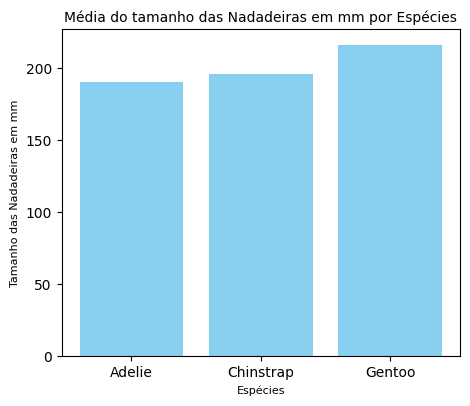

In [14]:
# Nadadeiras x Espécies.

# tamanho do gráfico
plt.figure(figsize=(8, 12))

# tamanho
plt.subplot(3, 1, 1)

# Dados
# agrupamento por species e o calculo da mediana
dt_avg = dt.groupby('species')['flipper_length_mm'].median().reset_index()
# resultado e ordenação dos dados
dt_avg = dt_avg.sort_values(by='flipper_length_mm', ascending=True)

#tipo de gráfico.
plt.bar(dt_avg['species'], dt_avg['flipper_length_mm'], color='#89CFF0')

#legendas do titulo, x e y
plt.title('Média do tamanho das Nadadeiras em mm por Espécies', fontsize=10)
plt.xlabel('Espécies', fontsize = 8)
plt.ylabel('Tamanho das Nadadeiras em mm', fontsize = 8)

#ajuste dos gráficos e o plot
plt.tight_layout(rect=[0, 0, 0.6, 0.95]) 
plt.show()

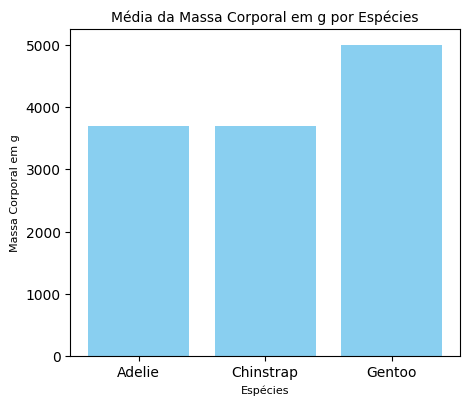

In [17]:
# Massa Corporal x Espécies.

# tamanho do gráfico
plt.figure(figsize=(8, 12))

# tamanho
plt.subplot(3, 1, 1)

# Dados
# agrupamento por species e o calculo da mediana
dt_avg = dt.groupby('species')['body_mass_g'].median().reset_index()
# resultado e ordenação dos dados
dt_avg = dt_avg.sort_values(by='body_mass_g', ascending=True)

#tipo de gráfico.
plt.bar(dt_avg['species'], dt_avg['body_mass_g'], color='#89CFF0')

#legendas do titulo, x e y
plt.title('Média da Massa Corporal em g por Espécies', fontsize=10)
plt.xlabel('Espécies', fontsize = 8)
plt.ylabel('Massa Corporal em g', fontsize = 8)

#ajuste dos gráficos e plot
plt.tight_layout(rect=[0, 0, 0.6, 0.95]) 
plt.show()

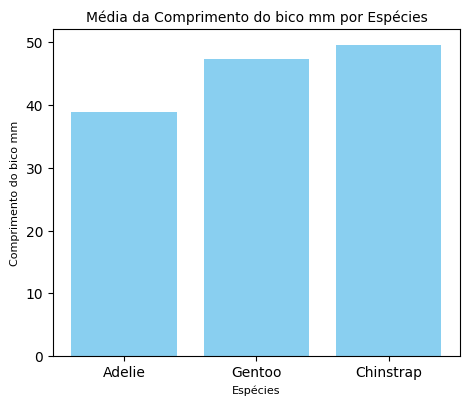

In [18]:
# Comprimento do Bico x Espécies.

# tamanho do gráfico
plt.figure(figsize=(8, 12))

# tamanho
plt.subplot(3, 1, 1)

# Dados
# agrupamento por species e o calculo da mediana
dt_avg = dt.groupby('species')['bill_length_mm'].median().reset_index()
# resultado e ordenação dos dados
dt_avg = dt_avg.sort_values(by='bill_length_mm', ascending=True)

#tipo de gráfico.
plt.bar(dt_avg['species'], dt_avg['bill_length_mm'], color='#89CFF0')

#legendas do titulo, x e y
plt.title('Média da Comprimento do bico mm por Espécies', fontsize=10)
plt.xlabel('Espécies', fontsize = 8)
plt.ylabel('Comprimento do bico mm', fontsize = 8)

#ajuste dos gráficos e plot
plt.tight_layout(rect=[0, 0, 0.6, 0.95]) 
plt.show()

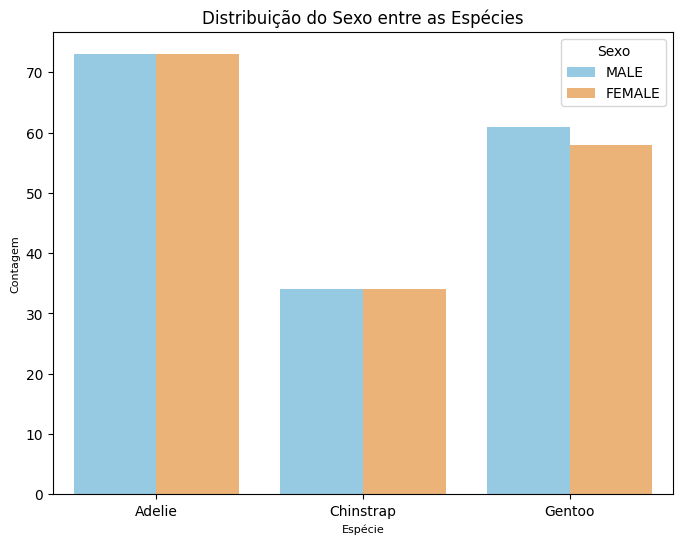

In [21]:
# tamanho do gráfico
plt.figure(figsize=(8, 6))

#paleta de cores
palette = ['#89CFF0', '#FFB366']

#tipo de gráfico 
sns.countplot(x='species', hue='sex', data=dt, palette=palette)

#legendas do titulo, x e y
plt.title('Distribuição do Sexo entre as Espécies')
plt.xlabel('Espécie', fontsize = 8)
plt.ylabel('Contagem', fontsize = 8)

#legenda e plot
plt.legend(title='Sexo')
plt.show()

## 2. Perguntas de partida e hipóteses

### 1. Perguntas de partida

01. O tamanho da massa corporal e do comprimento do bico, da mesma espécies, são diferente entre as ilhas?

02. Como a massa corporal de pinguins se correlaciona com a dimensão de bicos, entre a mesma espécie?

03. Há diferente entre a dimensão dos bicos e massa corpórea entre os sexos, em cada espécie?

04. Qual a relação entre a massa corporal e comprimento das nadadeiras, entre as espécies?

### 2. Hipóteses
**Hipótese 01**: O tamanho da massa corporal e do comprimento do bico da espécie Adelie, podem ser diferente entre as ilhas, pois pode ocorrer competição de comida.

**Hipótese 02**: Por ter uma dimensão de bicos menor, pode ingerirmenor quantidade de comida, sendo assim a massa corporea do pinguim pode ser menor do que a dos bicos com dimensão maior.

**Hipótese 03**: Pode ser que a fêmea tem os bicos menores, para poder alimentar melhor os filhotes, e a massa corporea pode ser menor também por que a femea alimenta os filhotes.

**Hipótese 04**: Pode ser que os pinguins que tem o tamanho das nadadeiras mais longas, também tem a massa corporal maior.

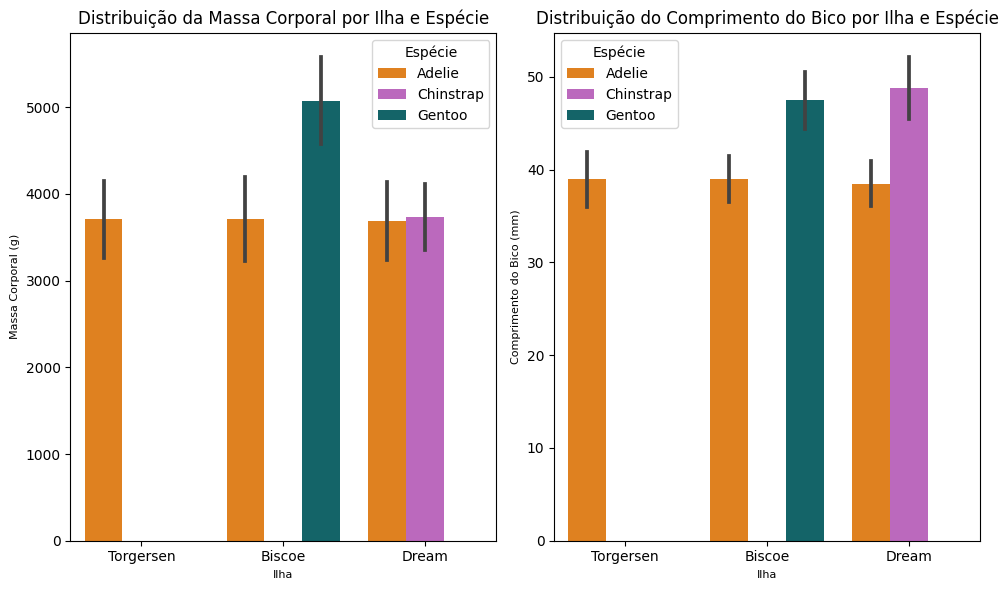

In [7]:
#01. O tamanho da massa corporal e nadadeiras, da mesma espécies, são diferente entre as ilhas?
plt.figure(figsize=(10, 6))
palette = [ '#FF8100','#C95BCB','#067176']

# Barra para massa corporal
plt.subplot(1, 2, 1)
#tipo de gráfico 
sns.barplot(x='island', y='body_mass_g', hue='species', data=dt, palette=palette, ci='sd')
#legendas
plt.title('Distribuição da Massa Corporal por Ilha e Espécie')
plt.xlabel('Ilha', fontsize = 8) 
plt.ylabel('Massa Corporal (g)', fontsize = 8)
plt.legend(title='Espécie')

# Barra para comprimento do bico
plt.subplot(1, 2, 2)
#tipo de gráfico 
sns.barplot(x='island', y='bill_length_mm', hue='species', data=dt, palette=palette, ci='sd')
#legendas
plt.title('Distribuição do Comprimento do Bico por Ilha e Espécie')
plt.xlabel('Ilha', fontsize = 8) 
plt.ylabel('Comprimento do Bico (mm)', fontsize = 8)
plt.legend(title='Espécie')

plt.tight_layout()
plt.show()

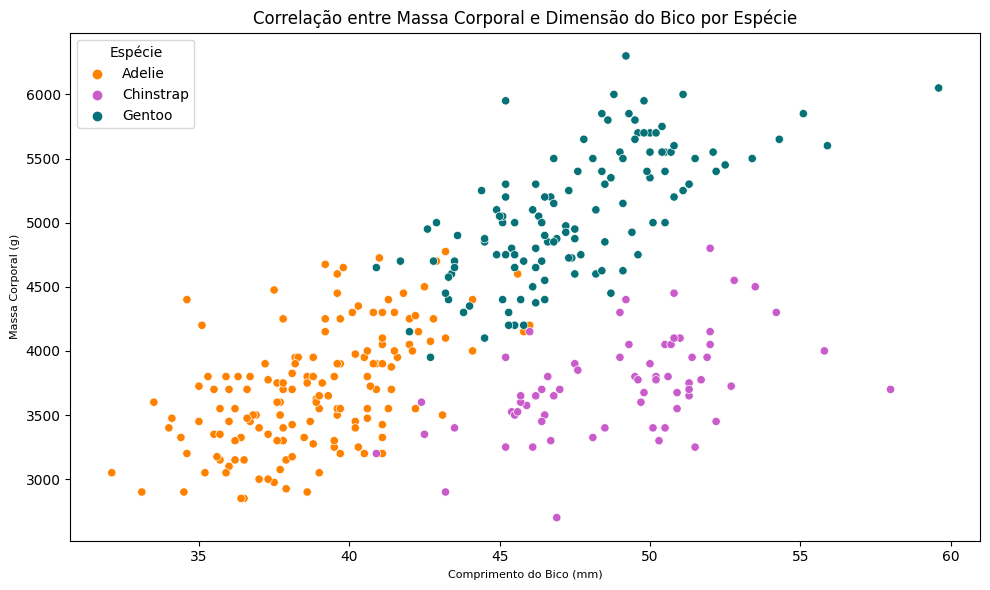

In [26]:
#02. Como a massa corporal de pinguins se correlaciona com a dimensão de bicos, da mesma espécie?
plt.figure(figsize=(10, 6))
palette = [ '#FF8100','#C95BCB','#067176']

#tipo de gráfico 
sns.scatterplot(data=dt, x='bill_length_mm', y='body_mass_g', hue='species', palette=palette)

#legendas
plt.title('Correlação entre Massa Corporal e Dimensão do Bico por Espécie')
plt.xlabel('Comprimento do Bico (mm)', fontsize = 8)
plt.ylabel('Massa Corporal (g)', fontsize = 8)
plt.legend(title='Espécie')

plt.tight_layout()
plt.show()

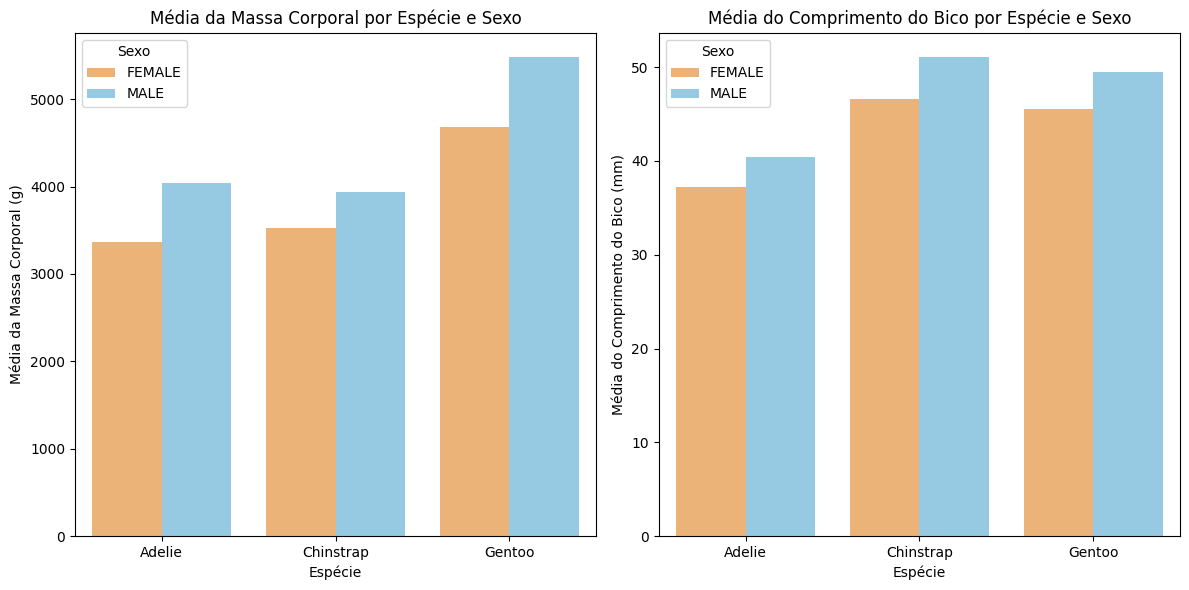

In [25]:
#03. Há diferente entre a dimensão dos bicos e massa corpórea entre os sexos, em cada espécie?
plt.figure(figsize=(12, 6))
palette = ['#FFB366', '#89CFF0']

#calculando as médias da massa corporal e do comprimento do bico para cada sexo e espécie
avg_mass = dt.groupby(['species', 'sex'])['body_mass_g'].mean().reset_index()
avg_bill_length = dt.groupby(['species', 'sex'])['bill_length_mm'].mean().reset_index()

# Gráfico de barras para a massa corporal
plt.subplot(1, 2, 1)
#tipo de gráfico 
sns.barplot(x='species', y='body_mass_g', hue='sex', data=avg_mass, palette=palette)
#legendas
plt.title('Média da Massa Corporal por Espécie e Sexo')
plt.xlabel('Espécie')
plt.ylabel('Média da Massa Corporal (g)')
plt.legend(title='Sexo')

# Gráfico de barras para o comprimento do bico
plt.subplot(1, 2, 2)
#tipo de gráfico 
sns.barplot(x='species', y='bill_length_mm', hue='sex', data=avg_bill_length, palette=palette)
#legendas
plt.title('Média do Comprimento do Bico por Espécie e Sexo')
plt.xlabel('Espécie')
plt.ylabel('Média do Comprimento do Bico (mm)')
plt.legend(title='Sexo')

plt.tight_layout()
plt.show()

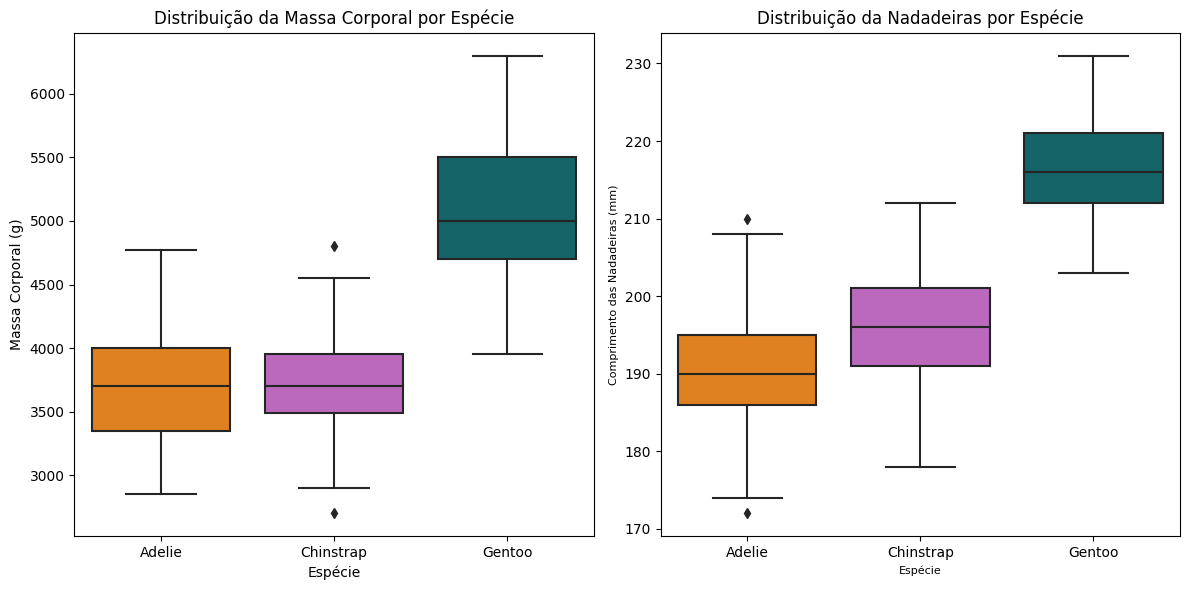

In [28]:
#04. Qual a relação entre a massa corporal e comprimento das nadadeiras, por espécies?
plt.figure(figsize=(12, 6))
palette = [ '#FF8100','#C95BCB','#067176']

# Boxplot para a massa corporal por espécie
plt.subplot(1, 2, 1)
#tipo de gráfico 
sns.boxplot(x='species', y='body_mass_g', data=dt, palette=palette)

#legendas
plt.title('Distribuição da Massa Corporal por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Massa Corporal (g)')

# Boxplot para o comprimento das nadadeiras por espécie
plt.subplot(1, 2, 2)
#tipo de gráfico 
sns.boxplot(x='species', y='flipper_length_mm', data=dt, palette=palette)

#legendas
plt.title('Distribuição da Nadadeiras por Espécie')
plt.xlabel('Espécie', fontsize = 8)
plt.ylabel('Comprimento das Nadadeiras (mm)', fontsize = 8)

plt.tight_layout()
plt.show()

## 3. Insights

01. Como temos duas espécies nas ilhas Dream e Biscoe, os dados mostram que não tem alteração expressiva entre os valores médios da espécie Adelie.

02. Segundo os dados não tem correlação clara entre o comprimento dos bicos e a massa corporal. Por exemplo a espécie Chinstrap tem a maior média de comprimento de bico, mas a sua massa corporal é aproximadamente igual à de outras espécies estudadas e que tem o bico com comprimento menor.

03. Os dados indicam que os machos tem a média de massa corporal maior do que as fêmeas, em todas as espécies, e também os machos tem a dimensão dos bicos maiores do que as fêmeas. Lembrando que faltam de alguns dados, especialmente sexo dos pinguins.

04. 